In [16]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [17]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [18]:
#data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data = ert.load(dir+"res2dinv_inputs/ERT_eastern_perpendicular_gps.Dat")
data

20/12/24 - 12:44:22 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 48 data: 565, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

20/12/24 - 12:44:23 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (2.1s x 6): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\4845330605075561305
20/12/24 - 12:44:23 - pyGIMLi - INFO - Cache c:\Users\mealiy001\AppData\Local\anaconda3\envs\pgcore\Lib\site-packages\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 6): C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\3783055265586703701


565 [31.17637906715631,...,31.309481391904864]

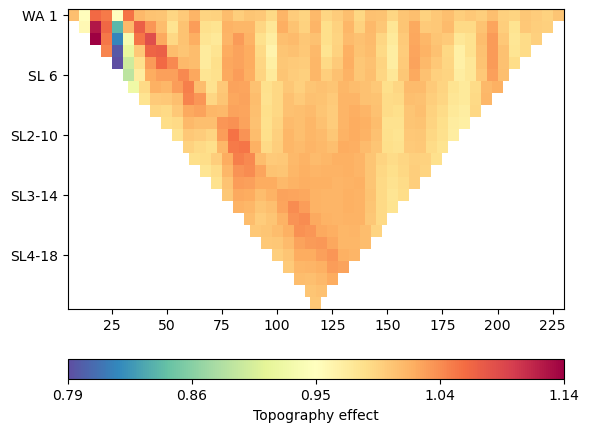

In [19]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(data)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2bda25a6110>)

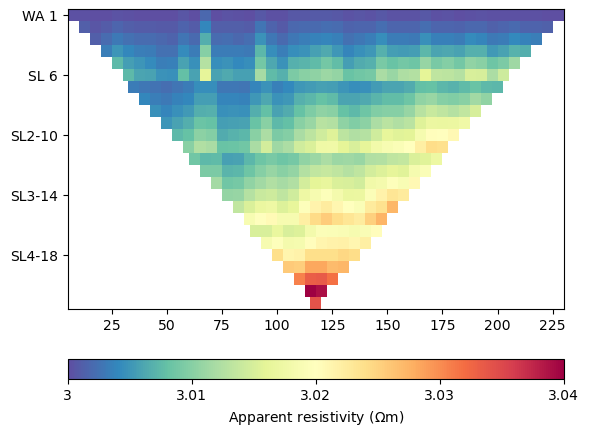

In [20]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1710c3f0290>)

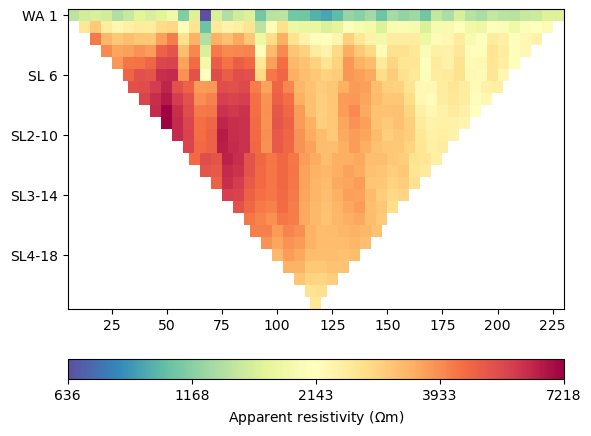

In [22]:
ert.showData(data)

20/12/24 - 12:56:39 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 12:56:39 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090


20/12/24 - 12:56:39 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA03CC350>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   27.53 (dPhi = 83.97%) lam: 70.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.71 (dPhi = 78.06%) lam: 70.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.96 (dPhi = 57.73%) lam: 70.0


################################################################################
#                  Abort criterion reached: chi² 

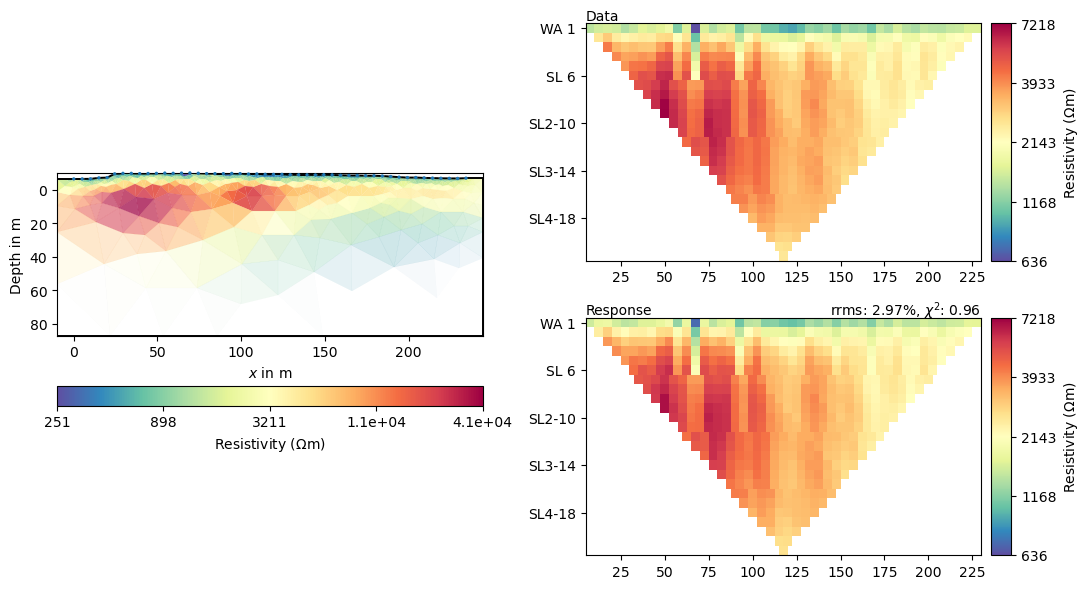

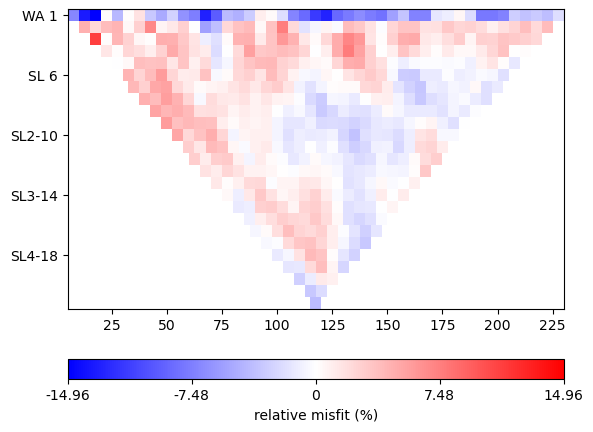

In [23]:
mod = mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=70, zWeight=0.2)


mgr.showResultAndFit()
mgr.showMisfit()

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1717ff02790>)

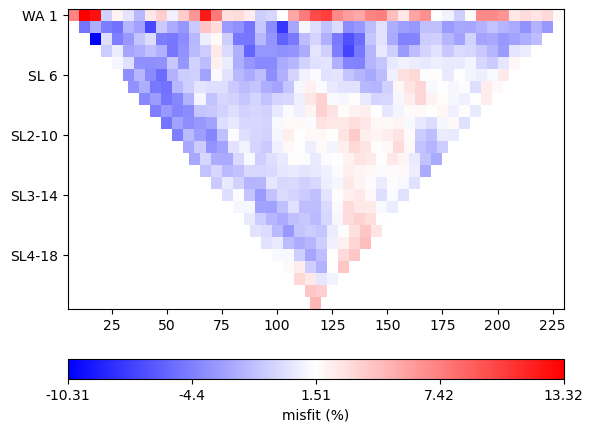

In [28]:
misfit = mgr.inv.response / mgr.data['rhoa'] * 100 - 100
pg.show(mgr.data, misfit, cMap="bwr", label="misfit (%)")  

09/12/24 - 14:45:10 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_eastern_perpendicular/ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_eastern_perpendicular/ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/ERTManager_eastern_perpendicular/ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

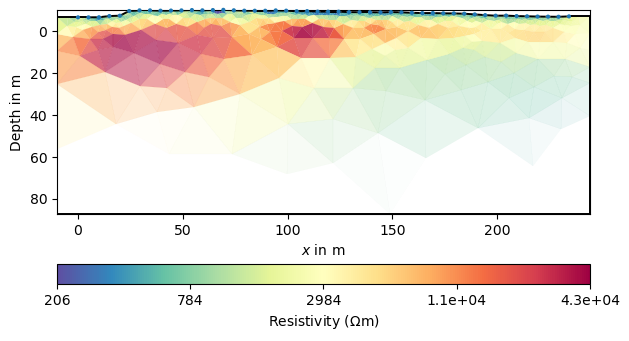

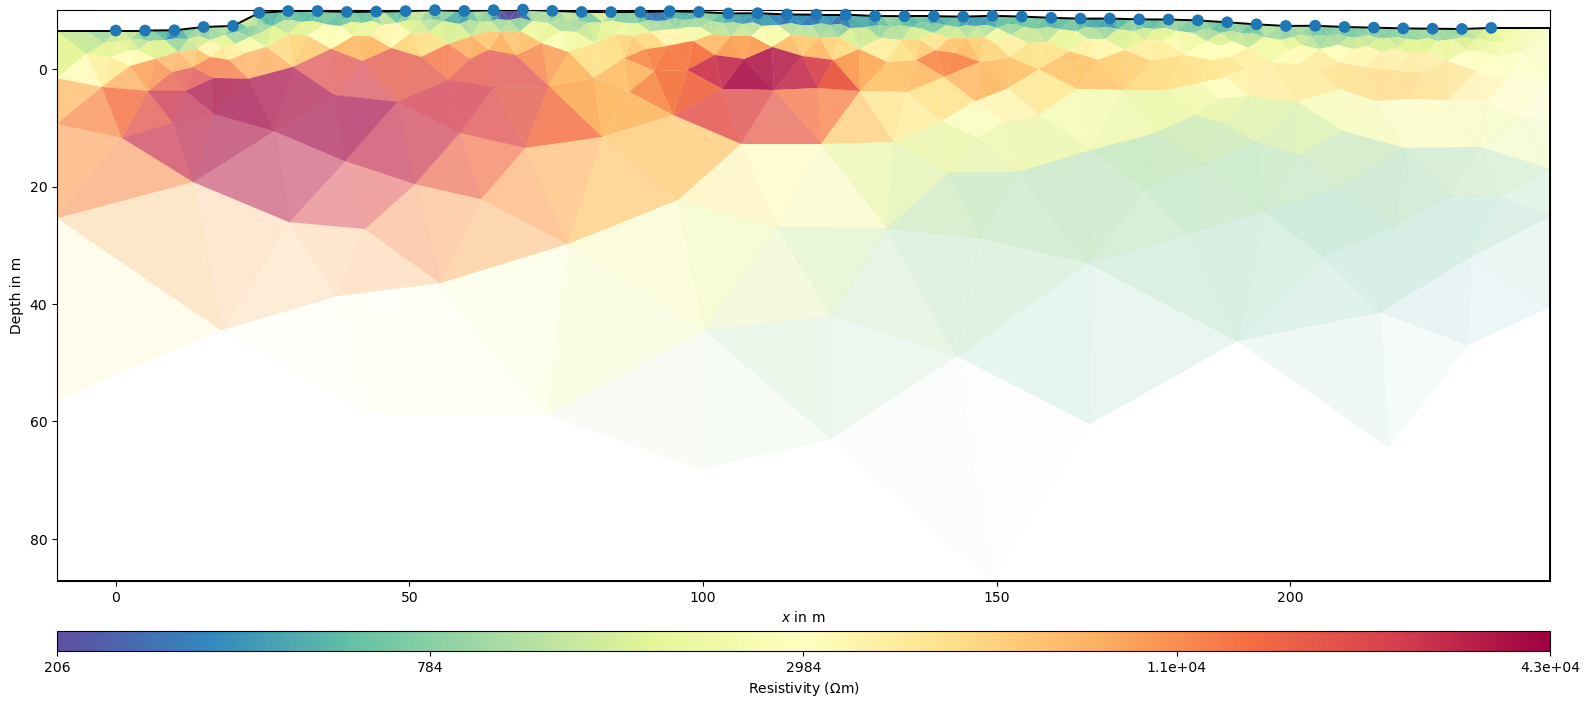

In [22]:
mgr.showResult(cMap="Spectral_r", logScale=True)
mgr.saveResult(dir+ 'pygimli/all_inversions/ERTManager_eastern_perpendicular/')

In [36]:
import numpy as np
import pygimli as pg

from pygimli import meshtools as mt
from pygimli.physics import ert
from pygimli.physics import traveltime as tt
from pygimli.physics.petro import transFwdArchieS as ArchieTrans
from pygimli.physics.petro import transFwdWyllieS as WyllieTrans
from pygimli.frameworks import (PetroInversionManager,
                                JointPetroInversionManager)

ertTrans = ArchieTrans(rFluid=10, phi=0.3)
pg.info("ERT Petrogeophysical Inversion")
ERTPetro = PetroInversionManager(petro=ertTrans, mgr=mgr)
satERT = ERTPetro.invert(data, limits=[0., 1.], lam=10,
                         verbose=False)
ERTPetro.inv.echoStatus()


13/12/24 - 16:08:40 - pyGIMLi - INFO - ERT Petrogeophysical Inversion
13/12/24 - 16:08:40 - pyGIMLi - INFO - Found 1 regions.
13/12/24 - 16:08:40 - pyGIMLi - INFO - Found 1 regions.
13/12/24 - 16:08:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/12/24 - 16:08:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
13/12/24 - 16:08:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1487 Cells: 2736 Boundaries: 2170
13/12/24 - 16:08:40 - pyGIMLi - INFO - Use median(data values)=3195.34009
13/12/24 - 16:08:40 - pyGIMLi - INFO - Created startmodel from forward operator: 684, min/max=0.186475/0.186475


(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x1717c735c10>)

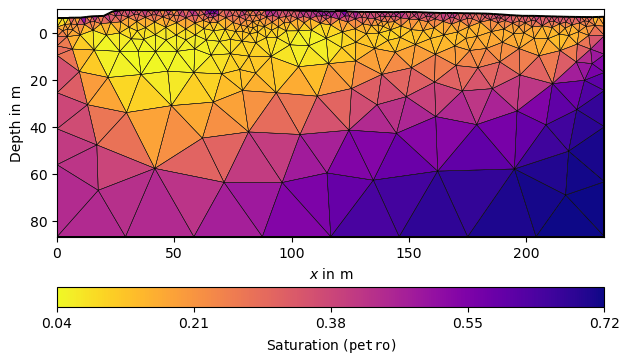

In [39]:
satKW = dict(logScale=False, cMap="plasma_r")
pg.show(ERTPetro.paraDomain, ERTPetro.paraModel(satERT), **satKW, 
             showMesh=True, label=r'Saturation (${\tt petro}$)')


20/12/24 - 15:02:09 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:02:09 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:02:09 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C74E40>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   31.51 (dPhi = 81.98%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.91 (dPhi = 67.51%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    4.70 (dPhi = 50.26%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... 

20/12/24 - 15:02:33 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:02:33 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:02:33 - pyGIMLi - INFO - Starting inversion.


chi² =    0.73 (dPhi = 77.51%) lam: 10.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.73)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C75930>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   31.25 (dPhi = 82.11%) lam: 11.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    9.58 (dPhi = 6

20/12/24 - 15:02:56 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:02:56 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:02:56 - pyGIMLi - INFO - Starting inversion.


chi² =    0.68 (dPhi = 75.70%) lam: 11.3


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.68)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C74E40>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   31.10 (dPhi = 82.19%) lam: 12.7
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.95 (dPhi = 6

20/12/24 - 15:03:17 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:03:17 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:03:17 - pyGIMLi - INFO - Starting inversion.


chi² =    0.64 (dPhi = 73.07%) lam: 12.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.64)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C76C70>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   30.81 (dPhi = 82.35%) lam: 14.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.66 (dPhi = 7

20/12/24 - 15:03:35 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:03:35 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:03:35 - pyGIMLi - INFO - Starting inversion.


chi² =    0.61 (dPhi = 70.21%) lam: 14.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.61)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C759A0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   30.51 (dPhi = 82.51%) lam: 16.2
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    8.36 (dPhi = 7

20/12/24 - 15:03:53 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:03:53 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:03:53 - pyGIMLi - INFO - Starting inversion.


chi² =    0.59 (dPhi = 66.62%) lam: 16.2


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.59)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C75460>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   30.35 (dPhi = 82.59%) lam: 18.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.80 (dPhi = 7

20/12/24 - 15:04:11 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:04:11 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:04:11 - pyGIMLi - INFO - Starting inversion.


chi² =    2.55 (dPhi = 62.01%) lam: 18.3
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    0.57 (dPhi = 61.95%) lam: 18.3


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.57)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C76C70>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   30.02 (dPhi = 8

20/12/24 - 15:04:30 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:04:30 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:04:30 - pyGIMLi - INFO - Starting inversion.


chi² =    0.57 (dPhi = 57.02%) lam: 20.7


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.57)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C75930>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   29.86 (dPhi = 82.84%) lam: 23.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    7.03 (dPhi = 7

20/12/24 - 15:04:47 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:04:47 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:04:47 - pyGIMLi - INFO - Starting inversion.


chi² =    0.57 (dPhi = 50.77%) lam: 23.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.57)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C74E40>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   29.53 (dPhi = 83.01%) lam: 26.4
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.80 (dPhi = 7

20/12/24 - 15:05:09 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:05:09 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:05:09 - pyGIMLi - INFO - Starting inversion.


chi² =    0.58 (dPhi = 44.72%) lam: 26.4


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.58)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C74E40>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   29.39 (dPhi = 83.07%) lam: 29.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.34 (dPhi = 7

20/12/24 - 15:05:31 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:05:31 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:05:31 - pyGIMLi - INFO - Starting inversion.


chi² =    0.59 (dPhi = 37.34%) lam: 29.8


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.59)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C759A0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   29.04 (dPhi = 83.26%) lam: 33.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    6.13 (dPhi = 7

20/12/24 - 15:05:47 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:05:47 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:05:47 - pyGIMLi - INFO - Starting inversion.


chi² =    0.61 (dPhi = 31.56%) lam: 33.6


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.61)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C759A0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   28.92 (dPhi = 83.31%) lam: 37.9
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.73 (dPhi = 7

20/12/24 - 15:06:06 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:06:06 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:06:06 - pyGIMLi - INFO - Starting inversion.


chi² =    0.64 (dPhi = 24.02%) lam: 37.9


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.64)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C76C70>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   28.55 (dPhi = 83.50%) lam: 42.8
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.56 (dPhi = 7

20/12/24 - 15:06:27 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:06:27 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:06:27 - pyGIMLi - INFO - Starting inversion.


chi² =    0.67 (dPhi = 18.54%) lam: 42.8


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.67)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C76C70>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   28.43 (dPhi = 83.54%) lam: 48.3
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.22 (dPhi = 7

20/12/24 - 15:06:43 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:06:43 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:06:43 - pyGIMLi - INFO - Starting inversion.


chi² =    0.99 (dPhi = 64.21%) lam: 48.3


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.99)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C74E40>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   28.04 (dPhi = 83.73%) lam: 54.6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    5.09 (dPhi = 7

20/12/24 - 15:07:00 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:07:00 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:07:00 - pyGIMLi - INFO - Starting inversion.


chi² =    0.96 (dPhi = 62.72%) lam: 54.6


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.96)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C759A0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   27.94 (dPhi = 83.76%) lam: 61.6
--------------------------------------------------------------------------------
inv.iter 2 ... 

20/12/24 - 15:07:16 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:07:16 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:07:16 - pyGIMLi - INFO - Starting inversion.


chi² =    4.81 (dPhi = 78.42%) lam: 61.6
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.94 (dPhi = 60.11%) lam: 61.6


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.94)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C75930>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   27.55 (dPhi = 8

20/12/24 - 15:07:33 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:07:33 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:07:33 - pyGIMLi - INFO - Starting inversion.


chi² =    0.96 (dPhi = 57.87%) lam: 69.5


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.96)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C759A0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... 

20/12/24 - 15:07:49 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:07:49 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:07:49 - pyGIMLi - INFO - Starting inversion.


chi² =   27.45 (dPhi = 83.97%) lam: 78.5
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.48 (dPhi = 78.39%) lam: 78.5
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    0.98 (dPhi = 54.54%) lam: 78.5


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.98)                   #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C74E40>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ..

20/12/24 - 15:08:08 - pyGIMLi - INFO - Use median(data values)=3195.34009
20/12/24 - 15:08:08 - pyGIMLi - INFO - Created startmodel from forward operator: 871, min/max=3195.340090/3195.340090
20/12/24 - 15:08:08 - pyGIMLi - INFO - Starting inversion.


chi² =    1.00 (dPhi = 1.64%) lam: 88.6
################################################################################
#                Abort criterion reached: dPhi = 1.64 (< 2.0%)                 #
################################################################################
fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000002BDA249EFC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002BD9E6505E0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000002BDA1C759A0>
min/max (data): 636/7218
min/max (error): 3%/3.04%
min/max (start model): 3195/3195
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  175.56
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   26.96 (dPhi = 84.17%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    4.22 (dPhi = 77.

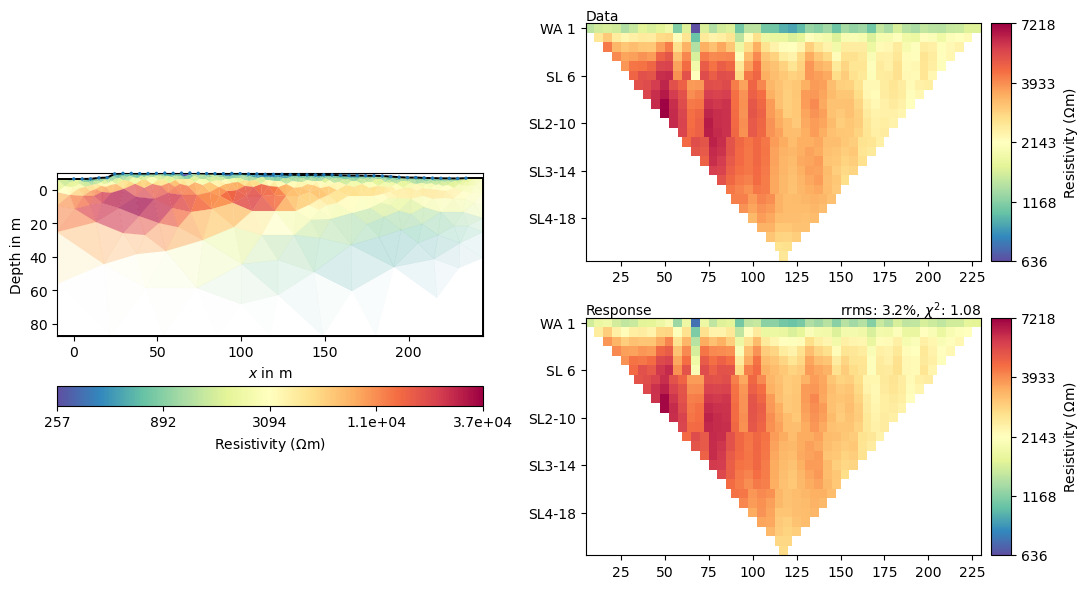

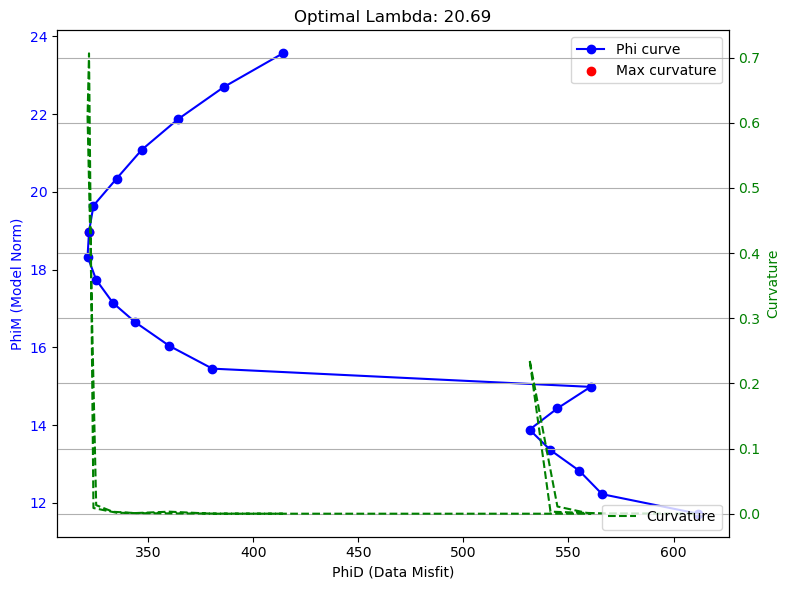

In [25]:

lambdas = np.logspace(1, 2, 20)
phiD = []
phiM = []
for lam in lambdas:
    mgr.invert(data, lam=lam, verbose=True, paraDX = 0.25, paraDZ= 0.25, zWeight=0.2)
    phiD.append(mgr.inv.phiData())
    phiM.append(mgr.inv.phiModel())


mgr.showResultAndFit()

phiD = np.array(phiD)
phiM = np.array(phiM)
dphiD = np.gradient(phiD, lambdas)  # First derivative of phiD w.r.t. lambdas
dphiM = np.gradient(phiM, lambdas)  # First derivative of phiM w.r.t. lambdas
ddphiD = np.gradient(dphiD, lambdas)  # Second derivative of phiD
ddphiM = np.gradient(dphiM, lambdas)  # Second derivative of phiM

# Compute curvature
curvature = np.abs(dphiD * ddphiM - dphiM * ddphiD) / (dphiD**2 + dphiM**2)**1.5

# Find maximum curvature
max_curvature_index = np.argmax(curvature)
optimal_lambda = lambdas[max_curvature_index]

# Plot Phi curve and curvature
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Phi curve
ax1.plot(phiD, phiM, '-o', label='Phi curve', color='blue')
ax1.scatter(phiD[max_curvature_index], phiM[max_curvature_index], color='red', label='Max curvature')
ax1.set_xlabel('PhiD (Data Misfit)')
ax1.set_ylabel('PhiM (Model Norm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper right')

# Add curvature plot on secondary axis
ax2 = ax1.twinx()
ax2.plot(phiD, curvature, '--', label='Curvature', color='green')
ax2.set_ylabel('Curvature', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='lower right')

plt.title(f'Optimal Lambda: {optimal_lambda:.2f}')
plt.grid()
plt.tight_layout()
plt.show()

(<Axes: xlabel='$x$ in m', ylabel='Depth in m'>,
 <matplotlib.colorbar.Colorbar at 0x28e3f352810>)

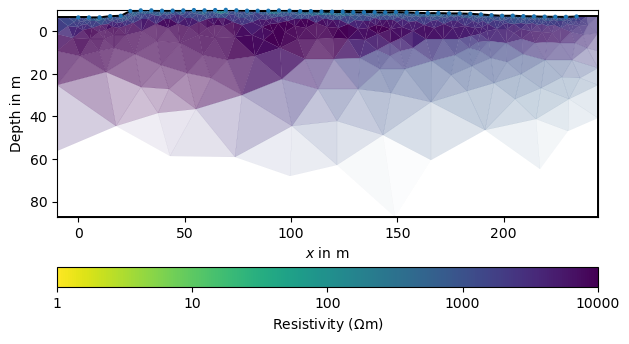

In [23]:
mgr.showResult(cMap='viridis_r', cMin=1, cMax=10000)

(-40.0, 11.141096614746566)

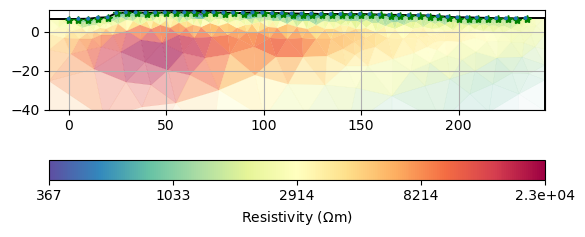

In [18]:
from pygimli.viewer.mpl import draw1DColumn

AL = np.loadtxt(dir + "pygimli/AL_eastern_parallel_to_shore.txt")

x_AL = AL[:, 0]
z_AL = AL[:, 1]

ax, cb = mgr.showResult()
#ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g*', linewidth=0.5)
ax.grid(True)
ax.set_ylim(-40)